# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [11]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

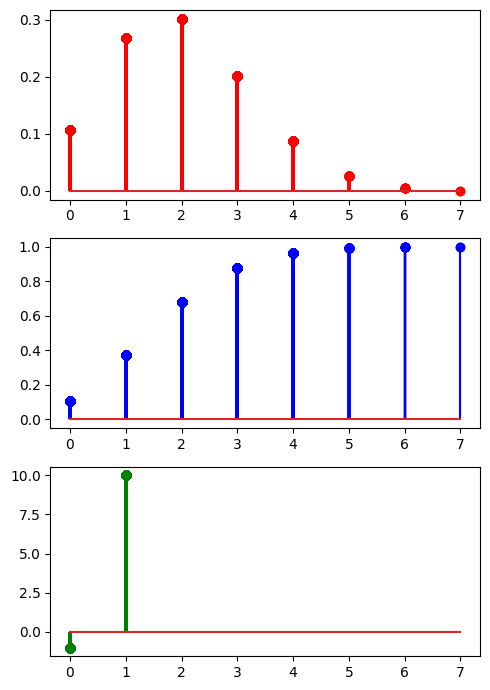

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

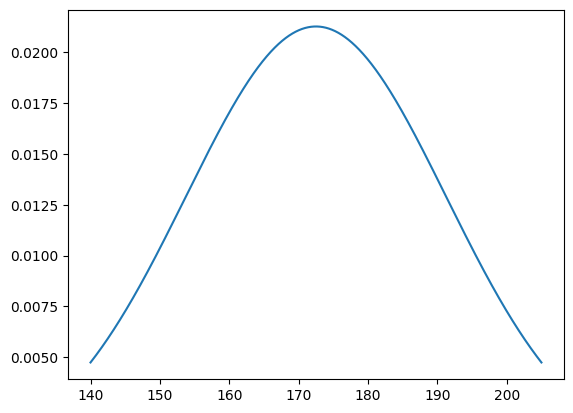

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def dnorm(x, med,desv):
    return norm.pdf(x, med, desv)
    
data = np.arange(140,205,0.01)
media = data.mean() #mu
desv = data.std() #sigma
pdf = dnorm(data,media,desv)

plt.plot(data,pdf)
plt.show()

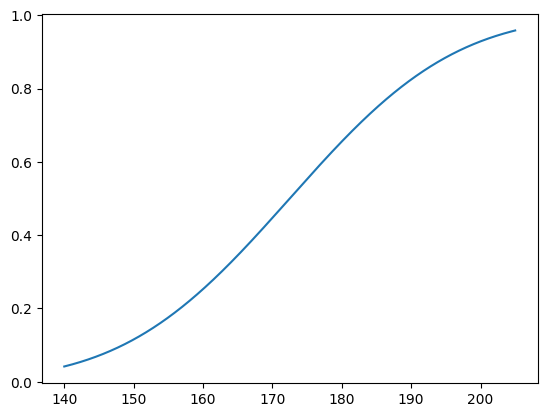

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def cnorm(x, med,desv):
    return norm.cdf(x, med, desv)

cdf = cnorm(data,media,desv)
media = data.mean() #mu
desv = data.std() #sigma

plt.plot(data,cdf)
plt.show()

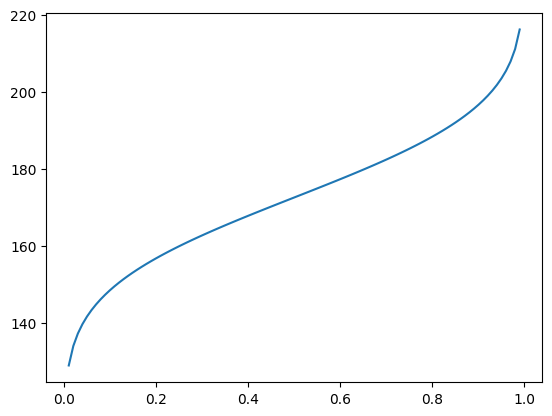

In [13]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def fnorm(x,mu,sigma):
    return mu +sigma *norm.ppf(x)

data = np.arange(140,205,0.01)
media = data.mean() #mu
desv = data.std() #sigma
q_values = np.linspace(0.01, 0.99, 100)  
ppf = fnorm(q_values, media, desv)

plt.plot(q_values, ppf)
plt.show()

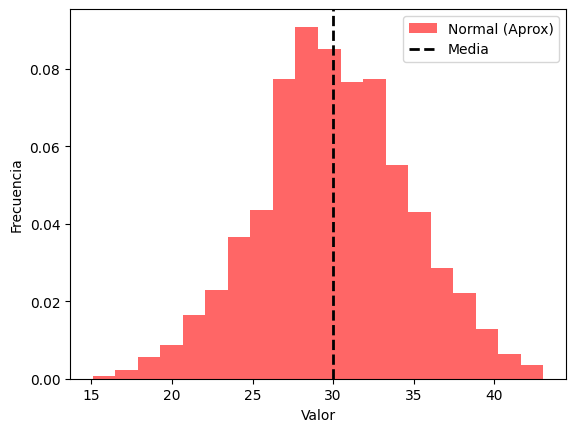

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  norm

n = 100   
p = 0.3  

mu = n * p  
sigma = np.sqrt(n * p * (1 - p)) 

datos_normales = norm.rvs(loc=mu, scale=sigma, size=1000)

plt.hist(datos_normales, bins=20, alpha=0.6, color='red', density=True, label="Normal (Aprox)")
plt.axvline(mu, color='k', linestyle='dashed', linewidth=2, label="Media")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

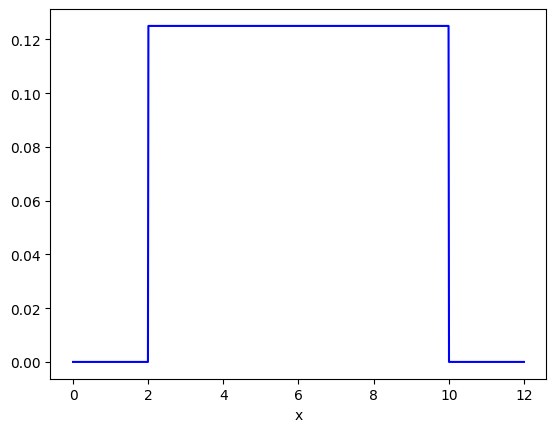

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def puniform(x,limI,limS):
    return uniform.pdf(x, loc=limI, scale=limS-limI)

a = 2    
b = 10   
data = np.linspace(0, 12, 1000)
pdf = puniform(data, a, b)

plt.plot(data, pdf, label=f"Uniforme U({a},{b})", color='blue')
plt.xlabel("x")
plt.show()

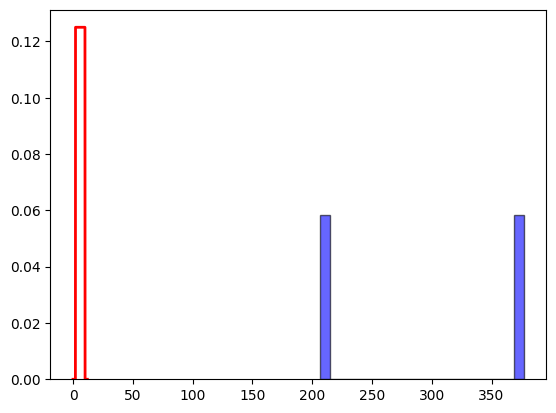

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def runiform(s, limI,limS):
    return uniform.rvs(loc=limI, scale=limS-limI,size=s)

a = 2    
b = 10   
data = np.linspace(0, 12, 1000)
rvs = runiform(a, b,1000)

plt.hist(rvs, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', label="Muestras aleatorias")

x = np.linspace(a-2, b+2, 1000)
pdf_values = uniform.pdf(x, loc=a, scale=b-a)
plt.plot(x, pdf_values, 'r-', lw=2, label="PDF teórica")
plt.show()

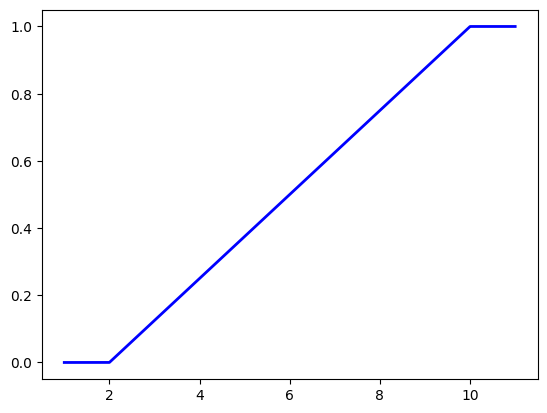

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def cuniform(x, limI,limS):
    return uniform.cdf(x,loc=limI, scale=limS-limI)

a = 2    
b = 10  
x = np.linspace(a-1, b+1, 1000)
cdf = cuniform(x, a, b)

plt.plot(x, cdf, label=f"CDF de U({a},{b})", color='blue', lw=2)
plt.show()

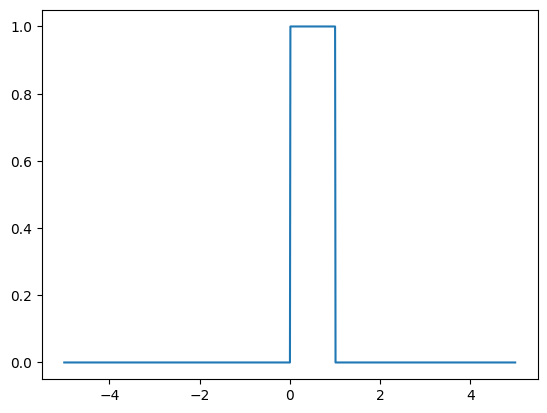

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Uniform
def dunif(x, limI, limS):
    return uniform.pdf(x, loc = limI, scale = (limS - limI))
     
a = 0   
b = 1
x = np.arange(-5, 5, 0.01)

pmf = dunif(x, a, b)

plt.plot(x, pmf)
plt.show()


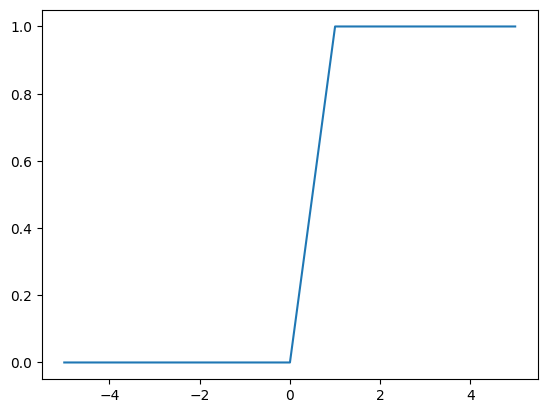

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def punif(x, limI, limS):
    return uniform.cdf(x, loc = limI, scale = (limS - limI))

def qunif(x, limI, limS):
    return uniform.ppf(x, loc = limI, scale = (limS - limI))

a = 0   
b = 1
x = np.arange(-5, 5, 0.01)

cdf = punif(x, a, b)

plt.plot(x, cdf)
plt.show()


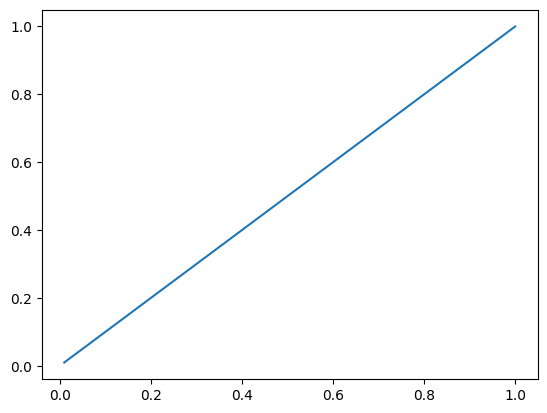

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def qunif(x, limI, limS):
    return uniform.ppf(x, loc = limI, scale = (limS - limI))

a = 0   
b = 1
x = np.arange(-5, 5, 0.01)

ppf = qunif(x, a, b)

plt.plot(x, ppf)
plt.show()
